In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
     "text.usetex": True,
     "font.family": "Helvetica"
})

## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  

Then do the same cubic splines (look at `CubicSpline`)

Plot the resulting interpolant.

Absolute differences of interpolation errorr = 
[0.00000000e+00 6.93889390e-18 0.00000000e+00 0.00000000e+00
 6.93889390e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.93889390e-18 6.93889390e-18 6.93889390e-18 6.93889390e-18
 1.38777878e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.38777878e-17 0.00000000e+00 0.00000000e+00 1.38777878e-17
 0.00000000e+00 1.38777878e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.77555756e-17 2.77555756e-17 5.55111512e-17
 0.00000000e+00 0.00000000e+00 5.55111512e-17 0.00000000e+00
 0.00000000e+00 5.55111512e-17 5.55111512e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.11022302e-16 0.00000000e+00 1.11022302e-16 1.11022302e-16
 1.11022302e-16 0.00000000e+00 1.11022302e-16 1.11022302e-16
 0.00000000e+00 1.11022302e-16 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 5.55111512e-17 0.0000

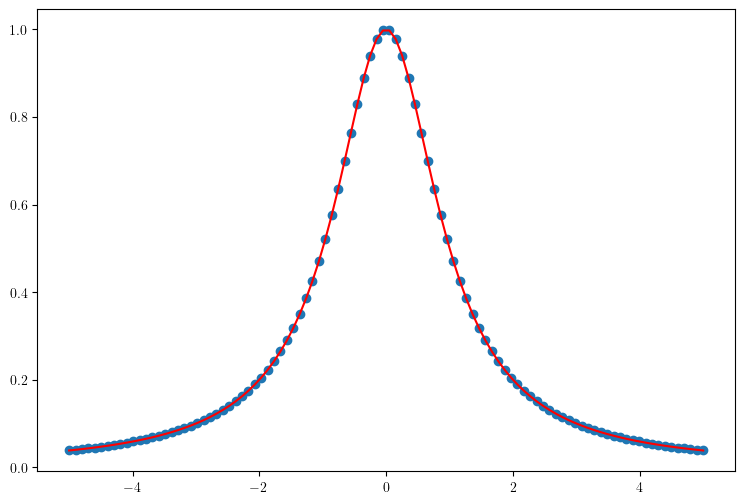

In [11]:
import scipy.interpolate as interpolate

def f(x):
    # return -np.cos(np.exp(-x**4)) + x**2 -1
    return 1 / (x**2 + 1)
    
N = 3
x = np.linspace(-5.0, 5.0, 100)
fun = interpolate.interp1d(x, f(x), kind="cubic")
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(x, f(x))
ax.plot(x, fun(x), color='red')
print(f"Absolute differences of interpolation errorr = \n{np.abs(f(x) - fun(x))}")

## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods  becauses it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

zero in [-4,-2]  :  -3.0
zero in [0 , 2]  :  0.999999999999994
zero in [3 , 5]  :  4.0



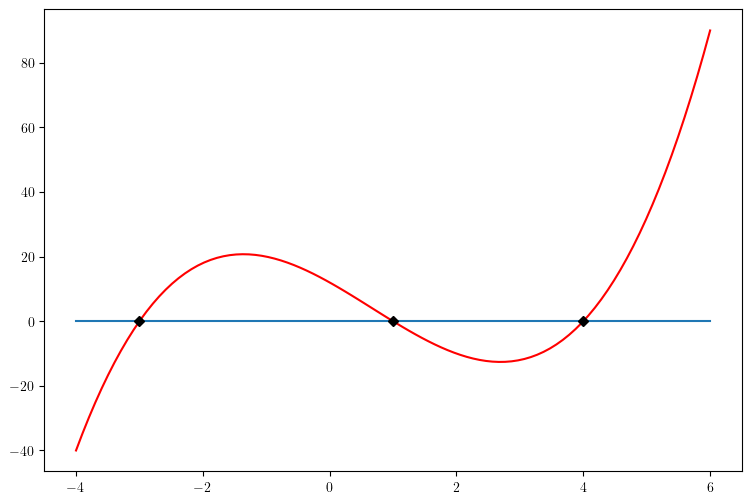

In [3]:
from scipy import optimize

fig, ax = plt.subplots(figsize=(9,6))

def f(x):
    return x**3 -2*x**2 -11*x +12

x = np.linspace(-4, 6, 100)
ax.plot(x, np.zeros(100))
ax.plot(x, f(x), color='red')
ax.plot(optimize.brentq(f, -4, -2), 0.0, color='black', marker='D', markersize=5)
ax.plot(optimize.brentq(f, 0, 2), 0.0, color='black', marker='D', markersize=5)
ax.plot(optimize.brentq(f, 3, 5), 0.0, color='black', marker='D', markersize=5)
print(f"zero in [-4,-2]  :  {optimize.brentq(f, -4, -2)}")
print(f"zero in [0 , 2]  :  {optimize.brentq(f, 0, 2)}")
print(f"zero in [3 , 5]  :  {optimize.brentq(f, 3, 5)}\n")